In [17]:
import requests
import jason
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
api_key = '0be9fc8148a421a62c0693b52d26ab09'

In [19]:
class FredPy:
    
#The __init__ method is the class constructor. It initializes the token attribute with the value 
#passed as an argument. The url attribute is set as a string containing the base URL for making API requests. 
#The URL is a template with placeholders ({seriesID}, {key},

    def __init__(self, token=None):
        self.token = token
        self.url = "https://api.stlouisfed.org/fred/series/observations" + \
                    "?series_id={seriesID}&api_key={key}&file_type=json" + \
                    "&observation_start={start}&observation_end={end}&units={units}"

#The set_token method allows setting or updating the API token by assigning the provided token 
#value to the token attribute.        
        
    def set_token(self, token):
        self.token = token

#The get_series method retrieves the series data from the FRED API based on the provided parameters: 
#seriesID (the unique identifier of the series), start and end (the date range for the data), and 
#units (the desired units of the data).

    def get_series(self, seriesID, start, end, units):

        # Inside the get_series method, the url_formatted variable is created by formatting 
        #the url attribute with the provided parameters using the format method. 
        #This substitutes the placeholders in the URL string with the actual values.
        
        url_formatted = self.url.format(
            seriesID=seriesID, start=start, end=end, units=units, key=self.token
        )

        #The requests.get function is used to send an HTTP GET request to the formatted URL, 
        #resulting in a response object.


        response = requests.get(url_formatted)
        
#If a token is specified (self.token is not None), the code checks if the response status code is 200 
#(indicating a successful response). If so, it processes the JSON data in the response to create a 
#Pandas DataFrame named data. The data includes the 'date' and 'value' columns, with appropriate transformations 
#applied. Finally, the DataFrame is returned.


        if(self.token):
            # If the response was successful, extract the data from it
            if(response.status_code == 200):
                data = pd.DataFrame(response.json()['observations'])[['date', 'value']]\
                        .assign(date = lambda cols: pd.to_datetime(cols['date']))\
                        .assign(value = lambda cols: cols['value'].astype(float))\
                        .rename(columns = {'value': seriesID})

                return data
#If a token is not specified or if the response status code is not 200, 
#exceptions are raised with appropriate error messages.
            
            else:
                raise Exception("Bad response from API, status code = {}".format(response.status_code))
        else:
            raise Exception("You did not specify an API key.")

In [20]:
#fredpy = FredPy(): This line creates an instance of the FredPy class and assigns it to the variable fredpy.

fredpy = FredPy()

# fredpy.set_token(api_key): Here, the set_token() method of the FredPy instance is called to set the API key. 
#The api_key variable should contain the actual API key value that you obtained from the FRED website

fredpy.set_token(api_key)

# Test getting the GDP series
data = fredpy.get_series(
    seriesID = 'GDP', 
    start = '2005-01-01',
    end = '2021-12-01', 
    units = 'pc1'
)

In [21]:
data

,date,GDP
0,2005-01-01,7.07714
1,2005-04-01,6.68582
2,2005-07-01,6.80467
3,2005-10-01,6.36207
4,2006-01-01,6.51567
...,...,...
63,2020-10-01,-0.00841
64,2021-01-01,3.60208
65,2021-04-01,17.36645
66,2021-07-01,10.24224


In [22]:
unemployment_data = fredpy.get_series(
    seriesID="UNRATE", 
    start = '2005-01-01',
    end = '2021-12-01', 
    units = 'lin'
)

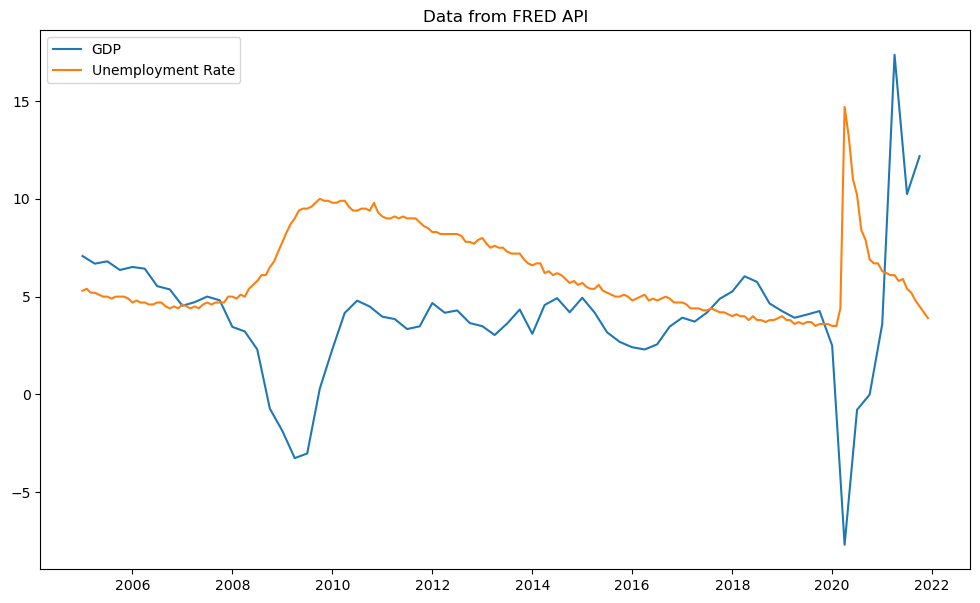

In [23]:

#This line creates a new figure with a specified figure size. The figsize parameter determines 
#the width and height of the figure in inches. 
#In this case, the figure size is set to 12 inches width and 7 inches height.

plt.figure(figsize = (12, 7)) 

#This line plots a line graph using the data from the 'date' column of the data DataFrame as the 
#x-axis and the 'GDP' column as the y-axis. 
#The label parameter is set to "GDP" for this line. The plot() function is used to create the line plot.

plt.plot(data['date'], data['GDP'], label="GDP")

#This line plots another line graph using the data from the 'date' column of the unemployment_data DataFrame 
#as the x-axis and the 'UNRATE' column as the y-axis. The label parameter is set to "Unemployment Rate" for 
#this line.

plt.plot(unemployment_data['date'], unemployment_data['UNRATE'], label="Unemployment Rate")

#This line adds a legend to the plot, displaying the labels defined for each line. 
#The legend helps identify which line corresponds to which data series.

plt.legend()

plt.title("Data from FRED API")
plt.show()